In [96]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import os
from PIL import Image

In [8]:
TRAIN_DATA_PATH = '../input/data/train/train.csv'
TRAIN_IMG_PATH = '../input/data/train/images/'
SUBMISSION_PATH = '../input/data/eval/info.csv'
EVAL_IMG_PATH = '../input/data/eval/images/'

In [55]:
train = pd.read_csv(TRAIN_DATA_PATH)
train.sample(10)

,id,gender,race,age,path
1181,003137,female,Asian,20,003137_female_Asian_20
1107,003046,female,Asian,20,003046_female_Asian_20
447,001067,male,Asian,24,001067_male_Asian_24
290,000712,female,Asian,50,000712_female_Asian_50
1604,003766,male,Asian,38,003766_male_Asian_38
2493,006472,female,Asian,18,006472_female_Asian_18
790,001526,female,Asian,24,001526_female_Asian_24
1465,003532,male,Asian,59,003532_male_Asian_59
1788,004244,female,Asian,60,004244_female_Asian_60
1626,003793,female,Asian,44,003793_female_Asian_44


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [58]:
def get_age_range(age):
  if age < 30:
    return '< 30'
  elif age >= 30 and age < 60:
    return '>= 30 and < 60'
  else:
    return '>= 60'

train['age_range'] = train['age'].apply(lambda x : get_age_range(x))

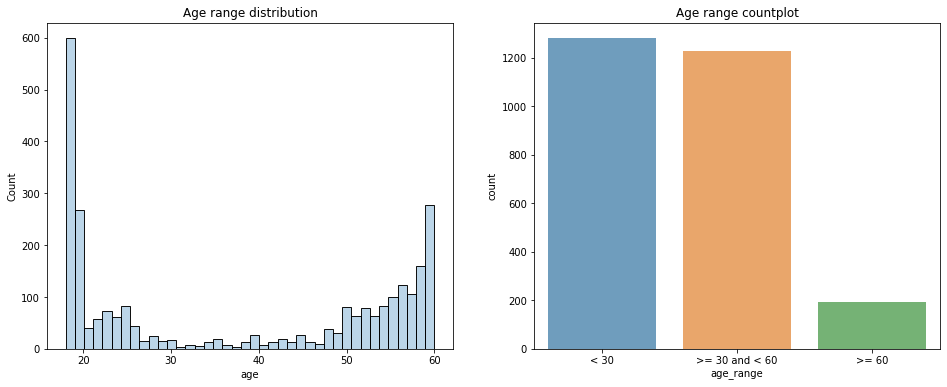

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

graph_1 = sns.histplot(data=train, x='age', fill=True, bins=40, alpha=.3, ax=axes[0])
axes[0].set_title('Age range distribution')

graph_2 = sns.countplot(data=train, x='age_range', alpha=.7, ax=axes[1], order=['< 30', '>= 30 and < 60', '>= 60'])
axes[1].set_title('Age range countplot')

plt.show()

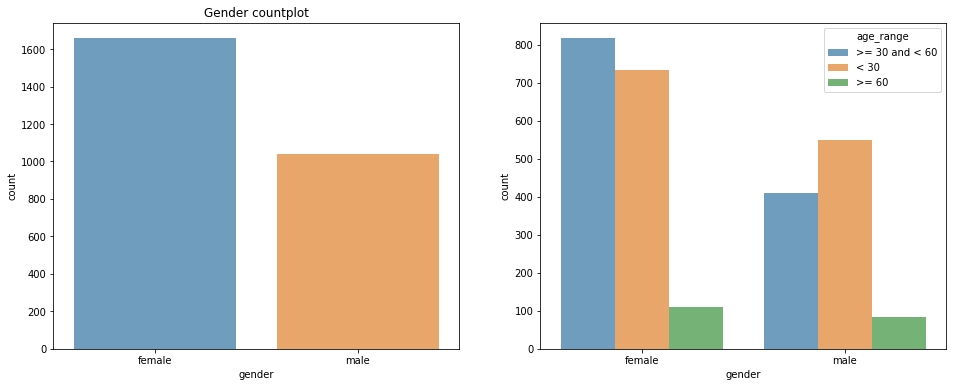

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

graph_1 = sns.countplot(data=train, x='gender', fill=True, alpha=.7, ax=axes[0])
axes[0].set_title('Gender countplot')

graph_2 = sns.countplot(data=train, x='gender', fill=True, alpha=.7, ax=axes[1], hue='age_range')

plt.show()

60세 이상의 데이터 불충분, Data Augmentation 필요함.

          id  gender   race  age                    path age_range
2503  006484  female  Asian   18  006484_female_Asian_18      < 30


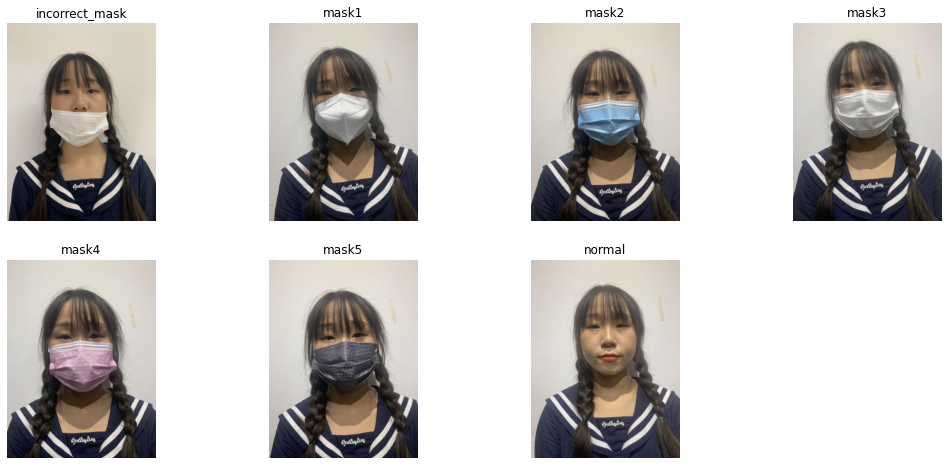

In [126]:
sample_img = train.sample()
print(sample_img)
sample_img_path = sample_img['path'].values[0]
sample_img_path = TRAIN_IMG_PATH + sample_img_path
sample_img_list = [img for img in os.listdir(sample_img_path) if '._' not in img]
sample_img_list = sorted(sample_img_list)
sample_img_list = [sample_img_path + '/' + i for i in sample_img_list]

fig = plt.figure(figsize=(18, 8))

for idx, filename in enumerate(sample_img_list):
  ax = fig.add_subplot(2, 4, idx+1)
  image = img.imread(filename)
  ax.imshow(image)
  ax.axis('off')
  ax.set_title(filename.split('/')[-1].split('.')[0])

plt.show()

          id  gender   race  age                    path       age_range
462   001085    male  Asian   26    001085_male_Asian_26            < 30
2101  005268    male  Asian   21    005268_male_Asian_21            < 30
197   000590    male  Asian   52    000590_male_Asian_52  >= 30 and < 60
47    000073  female  Asian   52  000073_female_Asian_52  >= 30 and < 60
2334  006179  female  Asian   18  006179_female_Asian_18            < 30


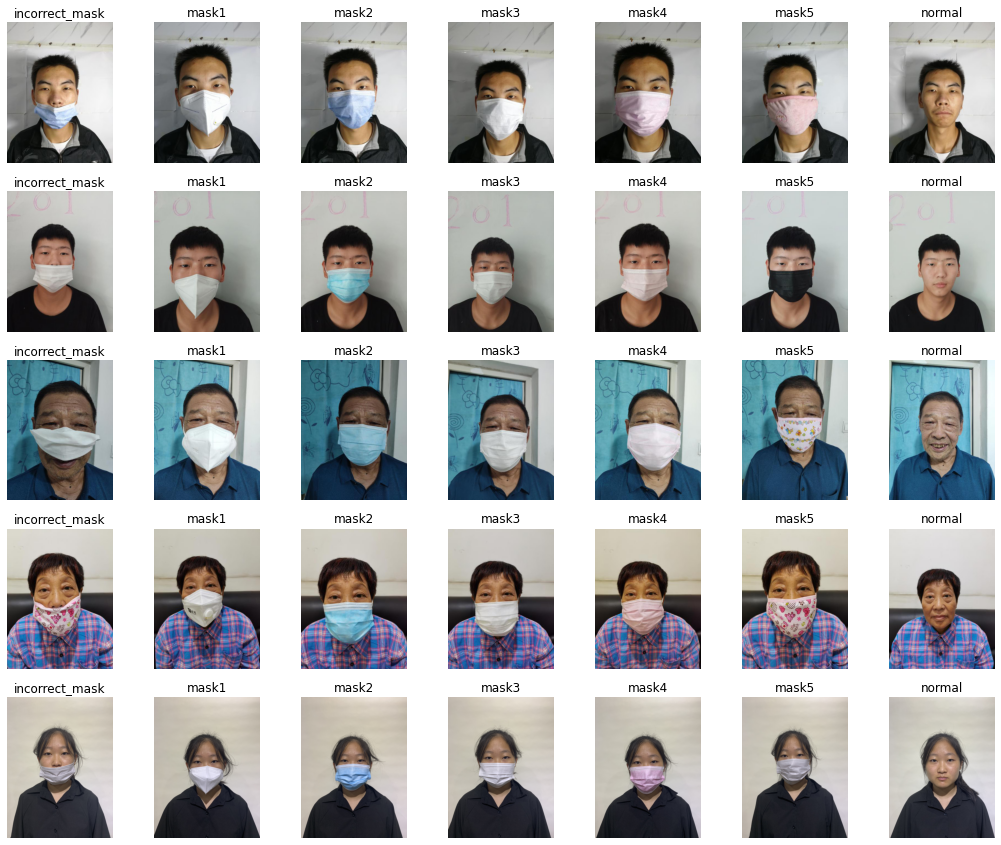

In [153]:
samples = train.sample(5)
print(samples)
samples_img_path = samples['path'].values

fig = plt.figure(figsize=(18, 15))
num = 1

for img_path in samples_img_path:
  sample_img_path = TRAIN_IMG_PATH + img_path
  sample_img_list = [img for img in os.listdir(sample_img_path) if '._' not in img]
  sample_img_list.sort()
  
  for idx, filename in enumerate(sample_img_list):
    img_path = sample_img_path + '/' + filename
    ax = fig.add_subplot(5, 7, num)
    num += 1
    image = img.imread(img_path)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(filename.split('.')[0])

plt.show()